In [46]:
## IMPORTING THE CLASSES ## 
from utils.consts import * ## const variables are there, so paths and extraction features ##
from utils. plotting import * ## plotting ##
from data_reader_babalit import * ## the class which reads balabit dataset ##
from data_reader_chaoshen import * ## the class which reads chaoshen datasets TODO There are several issues with this dataset -> explained later ##
from data_reader_singapur import * ## the class which reads singapur dataset##
from data_reader_dfl import * ## the class which reads dfl dataset ## 

from nonlegality_analyser import * ## the class which analyses the datasets without 0 1 labels --> splitting samples is being done there ##  
from legality_analyser import * ## the class which analyses the datasets with 0 1 labels --> splitting samples is being done there ##  



from OneClassSVMModel import *
from IsolationForestModel import *

import random

In [47]:
## Specyfing the USERS ## 
users = [7,9,15,16,20,21,23,29, 35] ## those are all users 
## Creating the object which analyses the dataset ## 
balabit_reader = DataReaderBalabit(BALABIT, users, False, limit = 1000) ## the arguments are DATASET, users, supervised, how many records should be procesed ##
balabit_reader.processDataWithoutLabels() ## creating the data without labels ##



File already exist


In [48]:
## getting path from the reader ##
print(balabit_reader.fileName) 
path = balabit_reader.getFileName()

## creating analyser class ## 
balabitAnalyser = nonLegalityAnalyser(path)
## counting how many actions were extracted ## 
print(balabitAnalyser.countActions())

processed_files\balabit_dataset_users[7, 9, 15, 16, 20, 21, 23, 29, 35]_limit1000_labelsFalse.csv
type_of_action     1    3    4
userid                        
7                679  812   88
9                798  830  107
15               547  641   89
16               538  608  113
20              1141  823   95
21               704  550   90
23               494  703   61
29               357  662  112
35               672  617   94


In [ ]:
def createTable(best_parameters ,roc_auc):
    df = pd.DataFrame({
    'User': list(best_parameters.keys()),
    'Best Parameters': list(best_parameters.values()),
    'ROC AUC Score': list(roc_auc.values()),
})
    return df

In [9]:
# shuffle var will be used later in order to mix the data ## 
shuffle = True

## dictionaries of fpr tpr ## 
best_parameters = {}
roc_auc = {}

# ONE USER IS ALWAYS LEGAL ##
for legalUser in users:
    ## this function gets all samples of legaluser and then randomly selects the samples from other users - The data will be balanced ## 
    dataset = balabitAnalyser.createTrainingDataWithLabel(legalUser)
    X = dataset[:, 0:-1]
    y = dataset[:, -1]
    X_train, X_validation, y_train, y_validation = balabitAnalyser.trainingTestSplit(X, y, TEST_SIZE, shuffle)
    y_validation = np.where(y_validation == 0, -1, y_validation)
    
    model = IsolationForestModel(dataset, users)
    ## evaluating the model, the variables are X_train, y_train, X_validation, y_validation, scale --> use standardScler, and legalUser
    best_params, auc = model.getBestParams(X_train, y_train, X_validation, y_validation, scoring_type='roc_auc', num_actions = 1 )

    roc_auc[legalUser] = auc
    best_parameters[legalUser] = best_params
   


df = createTable(best_parameters, roc_auc)
df

Dataset with labels was used
Best Hyperparameters: {'contamination': 0.1, 'max_samples': 'auto', 'n_estimators': 50}
ROC AUC: 0.5205750315258512
Dataset with labels was used
Best Hyperparameters: {'contamination': 0.4, 'max_samples': 100, 'n_estimators': 50}
ROC AUC: 0.5794982915242937
Dataset with labels was used
Best Hyperparameters: {'contamination': 0.4, 'max_samples': 'auto', 'n_estimators': 50}
ROC AUC: 0.6125744601638123
Dataset with labels was used
Best Hyperparameters: {'contamination': 0.5, 'max_samples': 150, 'n_estimators': 200}
ROC AUC: 0.5075162309316317
Dataset with labels was used
Best Hyperparameters: {'contamination': 0.4, 'max_samples': 'auto', 'n_estimators': 100}
ROC AUC: 0.49314321287759766
Dataset with labels was used
Best Hyperparameters: {'contamination': 0.1, 'max_samples': 150, 'n_estimators': 50}
ROC AUC: 0.596730852233964
Dataset with labels was used
Best Hyperparameters: {'contamination': 0.5, 'max_samples': 150, 'n_estimators': 50}
ROC AUC: 0.647333333333

,User,Best Parameters,ROC AUC Score
0,7,"{'contamination': 0.1, 'max_samples': 'auto', ...",0.520575
1,9,"{'contamination': 0.4, 'max_samples': 100, 'n_...",0.579498
2,15,"{'contamination': 0.4, 'max_samples': 'auto', ...",0.612574
3,16,"{'contamination': 0.5, 'max_samples': 150, 'n_...",0.507516
4,20,"{'contamination': 0.4, 'max_samples': 'auto', ...",0.493143
5,21,"{'contamination': 0.1, 'max_samples': 150, 'n_...",0.596731
6,23,"{'contamination': 0.5, 'max_samples': 150, 'n_...",0.647333
7,29,"{'contamination': 0.4, 'max_samples': 'auto', ...",0.475880
8,35,"{'contamination': 0.5, 'max_samples': 100, 'n_...",0.663960


In [21]:
# shuffle var will be used later in order to mix the data ## 
shuffle = True

## dictionaries of fpr tpr ## 
best_parameters = {}
roc_auc = {}

# ONE USER IS ALWAYS LEGAL ##
for legalUser in users:
    ## this function gets all samples of legaluser and then randomly selects the samples from other users - The data will be balanced ## 
    dataset = balabitAnalyser.createTrainingDataWithLabel(legalUser)
    X = dataset[:, 0:-1]
    y = dataset[:, -1]
    X_train, X_validation, y_train, y_validation = balabitAnalyser.trainingTestSplit(X, y, TEST_SIZE, shuffle)
    y_validation = np.where(y_validation == 0, -1, y_validation)
    
    model = IsolationForestModel(dataset, users)
    ## evaluating the model, the variables are X_train, y_train, X_validation, y_validation, scale --> use standardScler, and legalUser
    best_params, auc = model.getBestParams(X_train, y_train, X_validation, y_validation, scoring_type='roc_auc', num_actions = 2 )

    roc_auc[legalUser] = auc
    best_parameters[legalUser] = best_params
   


df = createTable(best_parameters, roc_auc)
df

Dataset with labels was used
Best Hyperparameters: {'contamination': 0.2, 'max_samples': 150, 'n_estimators': 100}
ROC AUC: 0.5170048701298702
Dataset with labels was used
Best Hyperparameters: {'contamination': 0.05, 'max_samples': 100, 'n_estimators': 100}
ROC AUC: 0.628876700380751
Dataset with labels was used
Best Hyperparameters: {'contamination': 0.2, 'max_samples': 150, 'n_estimators': 50}
ROC AUC: 0.5789793249470668
Dataset with labels was used
Best Hyperparameters: {'contamination': 0.1, 'max_samples': 100, 'n_estimators': 100}
ROC AUC: 0.597900641025641
Dataset with labels was used
Best Hyperparameters: {'contamination': 0.1, 'max_samples': 'auto', 'n_estimators': 50}
ROC AUC: 0.40229186406135475
Dataset with labels was used
Best Hyperparameters: {'contamination': 0.2, 'max_samples': 100, 'n_estimators': 200}
ROC AUC: 0.6277223262427322
Dataset with labels was used
Best Hyperparameters: {'contamination': 0.05, 'max_samples': 100, 'n_estimators': 100}
ROC AUC: 0.68280929815573

,User,Best Parameters,ROC AUC Score
0,7,"{'contamination': 0.2, 'max_samples': 150, 'n_...",0.517005
1,9,"{'contamination': 0.05, 'max_samples': 100, 'n...",0.628877
2,15,"{'contamination': 0.2, 'max_samples': 150, 'n_...",0.578979
3,16,"{'contamination': 0.1, 'max_samples': 100, 'n_...",0.597901
4,20,"{'contamination': 0.1, 'max_samples': 'auto', ...",0.402292
5,21,"{'contamination': 0.2, 'max_samples': 100, 'n_...",0.627722
6,23,"{'contamination': 0.05, 'max_samples': 100, 'n...",0.682809
7,29,"{'contamination': 0.1, 'max_samples': 100, 'n_...",0.550439
8,35,"{'contamination': 0.05, 'max_samples': 100, 'n...",0.693201


In [10]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 0.9],
    'contamination': [0.01, 0.05, 0.1],
    'max_features': [1.0, 0.8, 0.6]
}

# Create the Isolation Forest model
model = IsolationForest()

# Use GridSearchCV for hyperparameter optimization
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'contamination': 0.01, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 100}


In [1]:
from OneClassSVMModel import *

In [10]:
# shuffle var will be used later in order to mix the data ## 
shuffle = True

## dictionaries of fpr tpr ## 
best_parameters = {}
roc_auc = {}

# ONE USER IS ALWAYS LEGAL ##
for legalUser in users:
    ## this function gets all samples of legaluser and then randomly selects the samples from other users - The data will be balanced ## 
    dataset = balabitAnalyser.createTrainingDataWithLabel(legalUser)
    X = dataset[:, 0:-1]
    y = dataset[:, -1]
    X_train, X_validation, y_train, y_validation = balabitAnalyser.trainingTestSplit(X, y, TEST_SIZE, shuffle)
    y_validation = np.where(y_validation == 0, -1, y_validation)
    
    model = OneClassSVMModel(dataset, users)
    ## evaluating the model, the variables are X_train, y_train, X_validation, y_validation, scale --> use standardScler, and legalUser
    best_params, auc = model.getBestParams(X_train, y_train, X_validation, y_validation, scoring_type='roc_auc', num_actions = 1 )

    roc_auc[legalUser] = auc
    best_parameters[legalUser] = best_params
   


df = createTable(best_parameters, roc_auc)
df

Dataset with labels was used
Best Hyperparameters: {'gamma': 0.1, 'kernel': 'poly', 'nu': 0.5}
ROC AUC: 0.4772556390977444
Dataset with labels was used
Best Hyperparameters: {'gamma': 0.1, 'kernel': 'poly', 'nu': 0.5}
ROC AUC: 0.4708266761346825
Dataset with labels was used
Best Hyperparameters: {'gamma': 0.1, 'kernel': 'poly', 'nu': 0.5}
ROC AUC: 0.5221727065192131
Dataset with labels was used
Best Hyperparameters: {'gamma': 0.1, 'kernel': 'poly', 'nu': 0.5}
ROC AUC: 0.44537318473488685
Dataset with labels was used
Best Hyperparameters: {'gamma': 0.1, 'kernel': 'poly', 'nu': 0.5}
ROC AUC: 0.4708845451079884
Dataset with labels was used
Best Hyperparameters: {'gamma': 0.1, 'kernel': 'poly', 'nu': 0.5}
ROC AUC: 0.45535416640944276
Dataset with labels was used
Best Hyperparameters: {'gamma': 0.1, 'kernel': 'poly', 'nu': 0.5}
ROC AUC: 0.48127673995001485
Dataset with labels was used
Best Hyperparameters: {'gamma': 0.1, 'kernel': 'poly', 'nu': 0.5}
ROC AUC: 0.47645949391404574
Dataset with

,User,Best Parameters,ROC AUC Score
0,7,"{'gamma': 0.1, 'kernel': 'poly', 'nu': 0.5}",0.477256
1,9,"{'gamma': 0.1, 'kernel': 'poly', 'nu': 0.5}",0.470827
2,15,"{'gamma': 0.1, 'kernel': 'poly', 'nu': 0.5}",0.522173
3,16,"{'gamma': 0.1, 'kernel': 'poly', 'nu': 0.5}",0.445373
4,20,"{'gamma': 0.1, 'kernel': 'poly', 'nu': 0.5}",0.470885
5,21,"{'gamma': 0.1, 'kernel': 'poly', 'nu': 0.5}",0.455354
6,23,"{'gamma': 0.1, 'kernel': 'poly', 'nu': 0.5}",0.481277
7,29,"{'gamma': 0.1, 'kernel': 'poly', 'nu': 0.5}",0.476459
8,35,"{'gamma': 0.1, 'kernel': 'poly', 'nu': 0.5}",0.484992


In [7]:
# shuffle var will be used later in order to mix the data ## 
shuffle = True

## dictionaries of fpr tpr ## 
best_parameters = {}
roc_auc = {}

# ONE USER IS ALWAYS LEGAL ##
for legalUser in users:
    ## this function gets all samples of legaluser and then randomly selects the samples from other users - The data will be balanced ## 
    dataset = balabitAnalyser.createTrainingDataWithLabel(legalUser)
    X = dataset[:, 0:-1]
    y = dataset[:, -1]
    X_train, X_validation, y_train, y_validation = balabitAnalyser.trainingTestSplit(X, y, TEST_SIZE, shuffle)
    y_validation = np.where(y_validation == 0, -1, y_validation)
    
    model = OneClassSVMModel(dataset, users)
    ## evaluating the model, the variables are X_train, y_train, X_validation, y_validation, scale --> use standardScler, and legalUser
    best_params, auc = model.getBestParams(X_train, y_train, X_validation, y_validation, scoring_type='roc_auc', num_actions = 2 )

    roc_auc[legalUser] = auc
    best_parameters[legalUser] = best_params
   


df = createTable(best_parameters, roc_auc)
df

Dataset with labels was used
Best Hyperparameters: {'gamma': 0.1, 'kernel': 'poly', 'nu': 0.5}
ROC AUC: 0.3972752777466053
Dataset with labels was used
Best Hyperparameters: {'gamma': 0.1, 'kernel': 'poly', 'nu': 0.5}
ROC AUC: 0.5091016728908284
Dataset with labels was used
Best Hyperparameters: {'gamma': 0.1, 'kernel': 'poly', 'nu': 0.5}
ROC AUC: 0.4962255589472816
Dataset with labels was used
Best Hyperparameters: {'gamma': 0.1, 'kernel': 'poly', 'nu': 0.5}
ROC AUC: 0.47509814323607424
Dataset with labels was used
Best Hyperparameters: {'gamma': 0.1, 'kernel': 'poly', 'nu': 0.5}
ROC AUC: 0.4164566372801282
Dataset with labels was used
Best Hyperparameters: {'gamma': 0.1, 'kernel': 'poly', 'nu': 0.5}
ROC AUC: 0.5127298444130127
Dataset with labels was used
Best Hyperparameters: {'gamma': 0.1, 'kernel': 'poly', 'nu': 0.5}
ROC AUC: 0.47280981769170743
Dataset with labels was used
Best Hyperparameters: {'gamma': 0.1, 'kernel': 'poly', 'nu': 0.5}
ROC AUC: 0.46824769433465085
Dataset with 

,User,Best Parameters,ROC AUC Score
0,7,"{'gamma': 0.1, 'kernel': 'poly', 'nu': 0.5}",0.397275
1,9,"{'gamma': 0.1, 'kernel': 'poly', 'nu': 0.5}",0.509102
2,15,"{'gamma': 0.1, 'kernel': 'poly', 'nu': 0.5}",0.496226
3,16,"{'gamma': 0.1, 'kernel': 'poly', 'nu': 0.5}",0.475098
4,20,"{'gamma': 0.1, 'kernel': 'poly', 'nu': 0.5}",0.416457
5,21,"{'gamma': 0.1, 'kernel': 'poly', 'nu': 0.5}",0.512730
6,23,"{'gamma': 0.1, 'kernel': 'poly', 'nu': 0.5}",0.472810
7,29,"{'gamma': 0.1, 'kernel': 'poly', 'nu': 0.5}",0.468248
8,35,"{'gamma': 0.1, 'kernel': 'poly', 'nu': 0.5}",0.464161


# NEW APPROACH


In [7]:
unique_values = set(y)
print("Unique values in y:", unique_values)

Unique values in y: {0.0, 1.0}


In [4]:
# shuffle var will be used later in order to mix the data ## 
shuffle = True

## dictionaries of fpr tpr ## 
best_parameters = {}
roc_auc = {}

# ONE USER IS ALWAYS LEGAL ##
for legalUser in users:
    ## this function gets all samples of legaluser and then randomly selects the samples from other users - The data will be balanced ## 
    dataset = balabitAnalyser.createTrainingDataWithLabel(legalUser)
    X = dataset[:, 0:-1]
    y = dataset[:, -1]
    X_train, X_validation, y_train, y_validation = balabitAnalyser.trainingTestSplit(X, y, TEST_SIZE, shuffle)
    y_validation = np.where(y_validation == 0, -1, y_validation)
    y_train = np.where(y_train == 0, -1, y_train)
    model = OneClassSVMModel(dataset, users)
    ## evaluating the model, the variables are X_train, y_train, X_validation, y_validation, scale --> use standardScler, and legalUser
    best_params, auc = model.getBestParams(X_train, y_train, X_validation, y_validation, scoring_type='roc_auc', num_actions = 2 )

    roc_auc[legalUser] = auc
    best_parameters[legalUser] = best_params
   


df = createTable(best_parameters, roc_auc)
df

Dataset with labels was used
Best Hyperparameters: {'gamma': 0.01, 'kernel': 'rbf', 'nu': 0.1}
ROC AUC: 0.689396013996653
Dataset with labels was used


KeyboardInterrupt: 

In [4]:
fpr = {}
tpr = {}
roc_auc = {}
shuffle = False
best_parameters = {}
for legalUser in users:
    training_data, test_data = balabitAnalyser.createDataForUnsupervised(legalUser, TEST_SIZE=TEST_SIZE)
    X = training_data[:, 0:-1]
    y = training_data[:, -1]
    x_val = test_data[:, 0:-1]
    y_val = test_data[:, -1]
    
    y = np.where(y == 0, -1, y)

    y_val = np.where(y_val == 0, -1, y_val)

    model = OneClassSVMModel(training_data, users)
    ## evaluating the model, the variables are X_train, y_train, X_validation, y_validation, scale --> use standardScler, and legalUser
    best_params, auc = model.getBestParams(X, y, x_val, y_val, scoring_type='roc_auc', num_actions = 1)

    roc_auc[legalUser] = auc
    best_parameters[legalUser] = best_params

df = createTable(best_parameters, roc_auc)
df

Dataset with labels was used
Best Hyperparameters: {'gamma': 0.1, 'kernel': 'linear', 'nu': 0.01}
ROC AUC: 0.25589317208364826
Dataset with labels was used
Best Hyperparameters: {'gamma': 10, 'kernel': 'rbf', 'nu': 0.5}
ROC AUC: 0.522913569583669
Dataset with labels was used
Best Hyperparameters: {'gamma': 0.1, 'kernel': 'linear', 'nu': 0.01}
ROC AUC: 0.612241445597847
Dataset with labels was used
Best Hyperparameters: {'gamma': 0.1, 'kernel': 'linear', 'nu': 0.01}
ROC AUC: 0.40226345613561687
Dataset with labels was used
Best Hyperparameters: {'gamma': 10, 'kernel': 'rbf', 'nu': 0.01}
ROC AUC: 0.5187454490560676
Dataset with labels was used
Best Hyperparameters: {'gamma': 0.1, 'kernel': 'linear', 'nu': 0.01}
ROC AUC: 0.40131432390287364
Dataset with labels was used
Best Hyperparameters: {'gamma': 0.1, 'kernel': 'linear', 'nu': 0.01}
ROC AUC: 0.5111347438929541
Dataset with labels was used
Best Hyperparameters: {'gamma': 0.1, 'kernel': 'linear', 'nu': 0.01}
ROC AUC: 0.6375792936016916


NameError: name 'createTable' is not defined

In [13]:
df = createTable(best_parameters, roc_auc)
df

,User,Best Parameters,ROC AUC Score
0,7,"{'gamma': 'scale', 'kernel': 'linear', 'nu': 0...",0.252255
1,9,"{'gamma': 'scale', 'kernel': 'linear', 'nu': 0...",0.214735
2,15,"{'gamma': 'scale', 'kernel': 'linear', 'nu': 0...",0.612503
3,16,"{'gamma': 'scale', 'kernel': 'linear', 'nu': 0...",0.476294
4,20,"{'gamma': 'scale', 'kernel': 'linear', 'nu': 0...",0.470249
5,21,"{'gamma': 'scale', 'kernel': 'linear', 'nu': 0...",0.404628
6,23,"{'gamma': 'scale', 'kernel': 'linear', 'nu': 0...",0.511278
7,29,"{'gamma': 'scale', 'kernel': 'linear', 'nu': 0...",0.598559
8,35,"{'gamma': 'scale', 'kernel': 'linear', 'nu': 0...",0.451139


In [4]:
fpr = {}
tpr = {}
roc_auc = {}
shuffle = False
for legalUser in users:
    dataset = balabitAnalyser.createTrainingDataWithLabel(legalUser)
    X_train, X_validation, y_train, y_validation = balabitAnalyser.trainingTestSplit(X, y, TEST_SIZE, shuffle)

    model = OneClassSVMModel(dataset, users)


    ## evaluating the model, the variables are X_train, y_train, X_validation, y_validation, scale --> use standardScler, and legalUser
    best_params, auc = model.getBestParams(X_train, y_train, X_validation, y_validation, scoring_type='roc_auc', num_actions = 1)

    roc_auc[legalUser] = auc
    best_parameters[legalUser] = best_params

df = createTable(best_parameters, roc_auc)
df
    

NameError: name 'X' is not defined

User 7 is being analyzed:
Test Accuracy: 0.50
7: 0.8248274124464601 threshold: -0.3275472544579654
User 9 is being analyzed:
Test Accuracy: 0.50
9: 0.7871836822828859 threshold: -0.34153357817533375
User 15 is being analyzed:
Test Accuracy: 0.51
15: 0.6383544790465205 threshold: -0.3618642275671886
User 16 is being analyzed:
Test Accuracy: 0.50
16: 0.827629720163172 threshold: -0.3139845828428291
User 20 is being analyzed:
Test Accuracy: 0.50
20: 0.7660681620402436 threshold: -0.34285350382912283
User 21 is being analyzed:
Test Accuracy: 0.50
21: 0.7672644241479172 threshold: -0.33942899654073677
User 23 is being analyzed:
Test Accuracy: 0.50
23: 0.8021777432104253 threshold: -0.3569118501595896
User 29 is being analyzed:
Test Accuracy: 0.50
29: 0.7396624637794659 threshold: -0.3408669338059035
User 35 is being analyzed:
Test Accuracy: 0.50
35: 0.8672022684310019 threshold: -0.34230442390433374


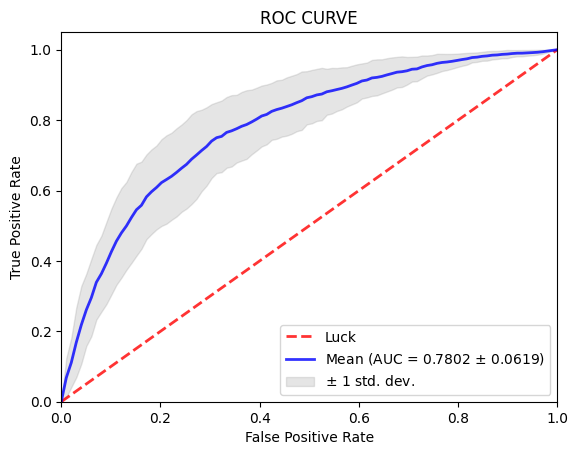

In [50]:
fpr = {}
tpr = {}
roc_auc = {}
shuffle = False
precission = {}
recall = {}
average_precision = {}
for legalUser in users:
    dataset = balabitAnalyser.createTrainingDataWithLabel(legalUser)
    X = dataset[:, 0:-1]
    y = dataset[:, -1]
    
    x_negative = X[y == 0]
    x_positive = X[y == 1] 

    X_train, X_validation, y_train, y_validation = balabitAnalyser.trainingTestSplit(X, y, TEST_SIZE, shuffle)
    y_validation = np.where(y_validation == 0, -1, y_validation)

    model = OneClassSVMModel(dataset, users, nu = 0.3, kernel="rbf", gamma = 1)
    fpr[legalUser], tpr[legalUser], thr, precission[legalUser],  recall[legalUser],  average_precision[legalUser] = model.evaluate(x_positive, y_train, X_validation, y_validation, legalUser)
    threshold = -1
    try:
        eer = brentq(lambda x: 1. - x - interp1d(fpr[legalUser], tpr[legalUser])(x), 0., 1.) ## brentq znajdowanie 0 , interpid interpolacja 
        threshold = interp1d(fpr[legalUser], thr)(eer)

    except (ZeroDivisionError, ValueError):
        print("Division by zero")

    roc_auc[legalUser] = auc(fpr[legalUser], tpr[legalUser])
  
    print(str(legalUser) + ": " + str(roc_auc[legalUser])+" threshold: "+str(threshold))

plotROCs(fpr, tpr, roc_auc, users)


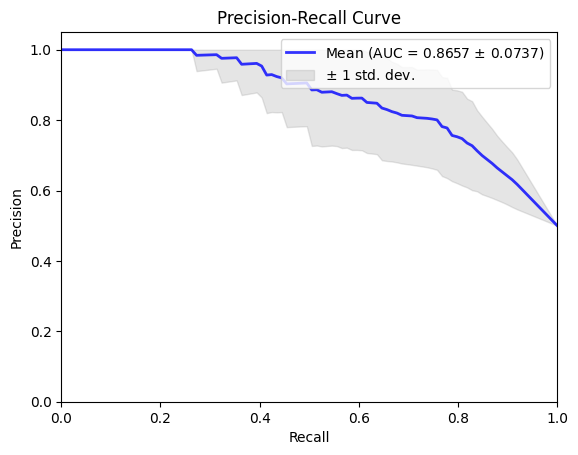

In [28]:
plot_precisions_recalls(precission, recall, average_precision)

User 7 is being analyzed:


Test Accuracy: 0.55
7: 0.5675988914084152 threshold: 0.007468810331116165
User 9 is being analyzed:
Test Accuracy: 0.55
9: 0.5896569193332725 threshold: 0.006642068969913975
User 15 is being analyzed:
Test Accuracy: 0.52
15: 0.5271049596309112 threshold: -0.014305880632108664
User 16 is being analyzed:
Test Accuracy: 0.64
16: 0.6789892223932954 threshold: -0.0079131257615005
User 20 is being analyzed:
Test Accuracy: 0.50
20: 0.49617868707857515 threshold: 0.006630732022187486
User 21 is being analyzed:
Test Accuracy: 0.63
21: 0.6769742704388505 threshold: -0.011929332980047667
User 23 is being analyzed:
Test Accuracy: 0.53
23: 0.680719353661053 threshold: -0.03736211268015954
User 29 is being analyzed:
Test Accuracy: 0.54
29: 0.5474195316782834 threshold: -0.002479983120548833
User 35 is being analyzed:
Test Accuracy: 0.72
35: 0.7866125813904641 threshold: 0.0036047449794312882


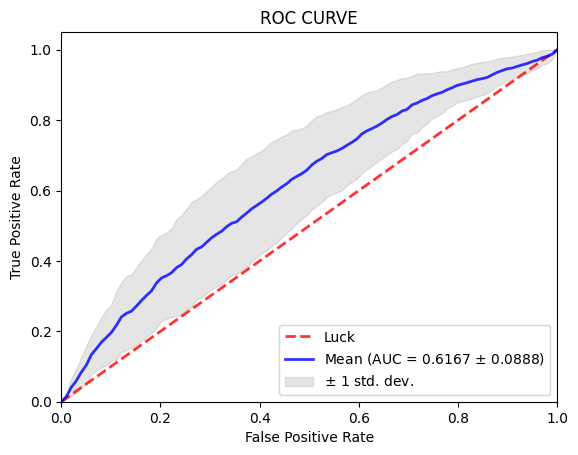

In [6]:
fpr = {}
tpr = {}
roc_auc = {}
shuffle = False
precission = {}
recall = {}
average_precision = {}
for legalUser in users:
    dataset = balabitAnalyser.createTrainingDataWithLabel(legalUser)
    X = dataset[:, 0:-1]
    y = dataset[:, -1]
    
    x_negative = X[y == 0]
    x_positive = X[y == 1] 

    X_train, X_validation, y_train, y_validation = balabitAnalyser.trainingTestSplit(X, y, TEST_SIZE, shuffle)
    y_validation = np.where(y_validation == 0, -1, y_validation)

    model = IsolationForestModel(dataset, users, contamination = 0.5, n_estimators=100, max_features = 10)
    fpr[legalUser], tpr[legalUser], thr, precission[legalUser],  recall[legalUser],  average_precision[legalUser] = model.evaluate(x_positive, y_train, X_validation, y_validation, legalUser)
    threshold = -1
    try:
        eer = brentq(lambda x: 1. - x - interp1d(fpr[legalUser], tpr[legalUser])(x), 0., 1.) ## brentq znajdowanie 0 , interpid interpolacja 
        threshold = interp1d(fpr[legalUser], thr)(eer)

    except (ZeroDivisionError, ValueError):
        print("Division by zero")

    roc_auc[legalUser] = auc(fpr[legalUser], tpr[legalUser])
  
    print(str(legalUser) + ": " + str(roc_auc[legalUser])+" threshold: "+str(threshold))

plotROCs(fpr, tpr, roc_auc, users)


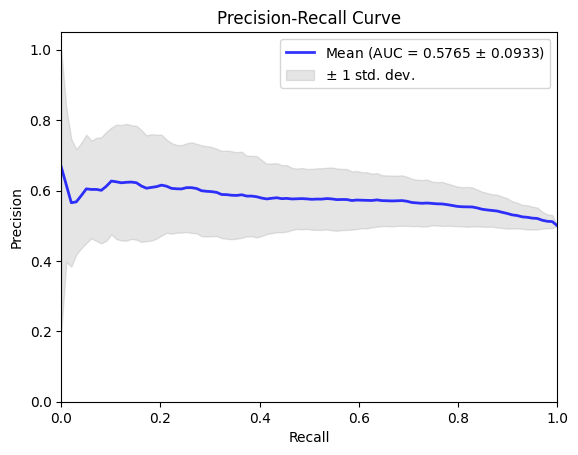

In [5]:
plot_precisions_recalls(precission, recall, average_precision)

In [4]:
# shuffle var will be used later in order to mix the data ## 
shuffle = True

## dictionaries of fpr tpr ## 
best_parameters = {}
roc_auc = {}

# ONE USER IS ALWAYS LEGAL ##
for legalUser in users:
    ## this function gets all samples of legaluser and then randomly selects the samples from other users - The data will be balanced ## 
    dataset = balabitAnalyser.createTrainingDataWithLabel(legalUser)
    X = dataset[:, 0:-1]
    y = dataset[:, -1]
    X_train, X_validation, y_train, y_validation = balabitAnalyser.trainingTestSplit(X, y, TEST_SIZE, shuffle)
    y_validation = np.where(y_validation == 0, -1, y_validation)
    
    model = OneClassSVMModel(dataset, users)
    ## evaluating the model, the variables are X_train, y_train, X_validation, y_validation, scale --> use standardScler, and legalUser
    best_params, auc = model.getBestParams(X_train, y_train, X_validation, y_validation, scoring_type='roc_auc', num_actions = 1 )

    roc_auc[legalUser] = auc
    best_parameters[legalUser] = best_params
   


df = createTable(best_parameters, roc_auc)
df

Dataset with labels was used
Best Hyperparameters: {'gamma': 0.01, 'kernel': 'rbf', 'nu': 0.1}
ROC AUC: 0.6442594533580586
Dataset with labels was used
Best Hyperparameters: {'gamma': 1, 'kernel': 'rbf', 'nu': 0.1}
ROC AUC: 0.6966248037676609
Dataset with labels was used
Best Hyperparameters: {'gamma': 1, 'kernel': 'rbf', 'nu': 0.5}
ROC AUC: 0.6306686450894927
Dataset with labels was used
Best Hyperparameters: {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.01}
ROC AUC: 0.46889541808941476
Dataset with labels was used
Best Hyperparameters: {'gamma': 0.01, 'kernel': 'rbf', 'nu': 0.01}
ROC AUC: 0.585974192324114
Dataset with labels was used
Best Hyperparameters: {'gamma': 0.1, 'kernel': 'rbf', 'nu': 0.5}
ROC AUC: 0.6036363636363635
Dataset with labels was used
Best Hyperparameters: {'gamma': 1, 'kernel': 'rbf', 'nu': 0.1}
ROC AUC: 0.6693022148130506
Dataset with labels was used
Best Hyperparameters: {'gamma': 10, 'kernel': 'rbf', 'nu': 0.5}
ROC AUC: 0.566692238089618
Dataset with labels was 

NameError: name 'createTable' is not defined

In [22]:
# shuffle var will be used later in order to mix the data ## 
shuffle = True

## dictionaries of fpr tpr ## 
best_parameters = {}
roc_auc = {}

# ONE USER IS ALWAYS LEGAL ##
for legalUser in users:
    ## this function gets all samples of legaluser and then randomly selects the samples from other users - The data will be balanced ## 
    dataset = balabitAnalyser.createTrainingDataWithLabel(legalUser)
    X = dataset[:, 0:-1]
    y = dataset[:, -1]
    X_train, X_validation, y_train, y_validation = balabitAnalyser.trainingTestSplit(X, y, TEST_SIZE, shuffle)
    y_validation = np.where(y_validation == 0, -1, y_validation)
    
    model = IsolationForestModel(dataset, users)
    ## evaluating the model, the variables are X_train, y_train, X_validation, y_validation, scale --> use standardScler, and legalUser
    best_params, auc = model.getBestParams(X_train, y_train, X_validation, y_validation, scoring_type='roc_auc', num_actions = 1 )

    roc_auc[legalUser] = auc
    best_parameters[legalUser] = best_params
   


df = createTable(best_parameters, roc_auc)
df

Dataset with labels was used
Best Hyperparameters: {'contamination': 0.2, 'max_samples': 150, 'n_estimators': 50}
ROC AUC: 0.5252581269662016
Dataset with labels was used


KeyboardInterrupt: 